In [7]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import joypy
import requests
import json

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


import tracemalloc
import time
import yellowbrick
from yellowbrick.regressor import ResidualsPlot, CooksDistance
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot

import lime 
from lime import lime_tabular
import shap
shap.initjs()
import re

import warnings
warnings.filterwarnings('ignore')

In [8]:
lr_df = pd.read_csv('lr_HDB.csv')
y = lr_df[['resale_price']]
X = lr_df.drop(['resale_price','town'], axis=1)

In [9]:
def tracing_start():
    tracemalloc.stop()
    print("nTracing Status : ", tracemalloc.is_tracing())
    tracemalloc.start()
    print("Tracing Status : ", tracemalloc.is_tracing())
def tracing_mem():
    first_size, first_peak = tracemalloc.get_traced_memory()
    peak = first_peak/(1024*1024)
    print("Peak Size in MB - ", peak)

Coefficients: [[ 0.18195232  0.10880132  0.00597049 -0.01906819  0.04103863 -0.01393295
   0.02976118 -0.0075445   0.01069481 -0.03518779 -0.02484728 -0.01179975
   0.06384253  0.0250863  -0.14849462 -0.30758507 -0.21523899 -0.23928983
   0.01811174  0.07953193  0.0445586   0.08650709  0.22065728]]
Intercept: [12.89642803]
R^2 score: 0.8836528769768278


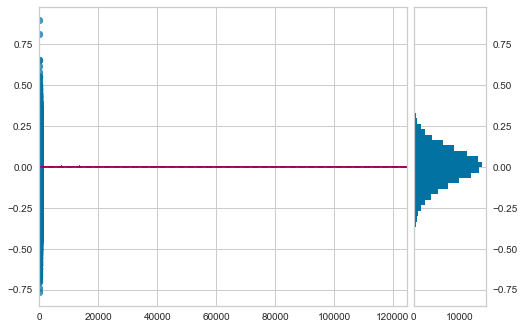

In [10]:
scaler = StandardScaler()

# Select columns to scale
scaled_columns = ['area_sqm','lease_start','school_dist','hawker_dist','num_hawker_2km','park_dist',
                    'num_park_2km', 'mall_dist', 'num_mall_2km', 'MRT_dist', 'num_MRT_2km', 'supermarket_dist']
# Fitting
scaler.fit(lr_df[scaled_columns])
scaled_columns = pd.DataFrame(scaler.transform(lr_df[scaled_columns]), index=lr_df.index, columns=scaled_columns)

# separate unscaled features
unscaled_columns = lr_df.drop(scaled_columns, axis=1)

# concatenate scaled and unscaled features
lr_df = pd.concat([scaled_columns,unscaled_columns], axis=1)

#Splitting of data
lr_y = lr_df[['resale_price']]
lr_X = lr_df.drop(['resale_price','town'], axis=1)

# #Handling skewed data via log algorithm
# yy = np.log(lr_y)['resale_price']
# XX = lr_X.values

# # Apply Cooks distance
# visualizer = CooksDistance()
# visualizer.fit(XX, yy)

# #  outlier removal
# model = LinearRegression()
# visualizer_residuals = ResidualsPlot(model)
# visualizer_residuals.fit(XX, yy)



# # remove outliers
# i_less_influential = (visualizer.distance_ <= visualizer.influence_threshold_)
# #X_li, y_li = XX[i_less_influential], yy[i_less_influential]
# lr_X, lr_y = lr_X[i_less_influential], lr_y[i_less_influential]

lin_reg = LinearRegression()
lin_reg.fit(lr_X, np.log(lr_y))

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(lr_X, np.log(lr_y))}')

